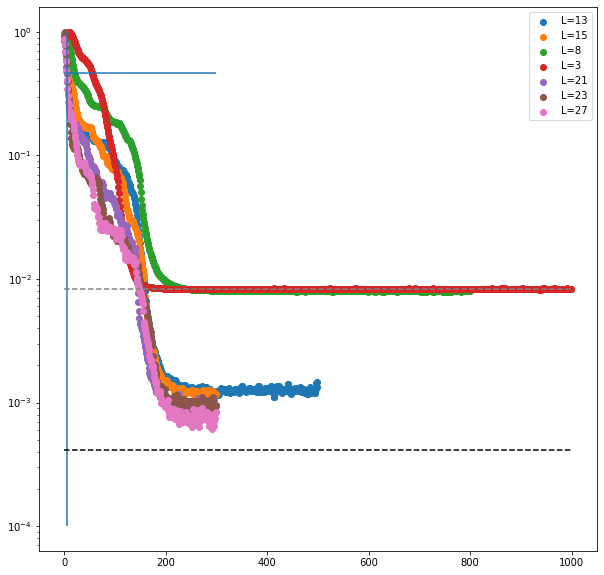

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 

arr =np.load("ampl_outputs/mismatch_6_13_500_x76_MSE_40_168_.npy")
x = np.arange(len(arr))

arr_2 =np.load("ampl_outputs/mismatch_6_15_300_x76_MSE_40_168_.npy")
x_2 = np.arange(len(arr_2))

arr_3 =np.load("ampl_outputs/mismatch_6_8_800_x76_MSE_40_168_.npy")
x_3 = np.arange(len(arr_3))

arr_4 =np.load("ampl_outputs/mismatch_6_3_1000_x76_MSE_40_168_.npy")
x_4 = np.arange(len(arr_4))

arr_5 =np.load("ampl_outputs/mismatch_6_21_300_x76_MSE_40_168_.npy")
x_5 = np.arange(len(arr_5))

arr_6 =np.load("ampl_outputs/mismatch_6_23_300_x76_MSE_40_168_.npy")
x_6 = np.arange(len(arr_6))

arr_7 =np.load("ampl_outputs/mismatch_6_27_300_x76_MSE_40_168_.npy")
x_7 = np.arange(len(arr_7))

plt.figure(figsize=(10,10))
plt.scatter(x,arr, label="L=13")
plt.scatter(x_2,arr_2, label="L=15")
plt.scatter(x_3,arr_3, label="L=8")
plt.scatter(x_4,arr_4, label="L=3")
plt.scatter(x_5,arr_5, label="L=21") # CX: 324 
plt.scatter(x_6,arr_6, label="L=23") # CX: 492
plt.scatter(x_7,arr_7, label="L=27") # CX: 576
plt.vlines(0.02*300, 1e-4, 1e0)
plt.hlines(4.62e-1, 0, 300)
plt.hlines(4.1e-4, 0, 1000, colors="black", linestyles="--")
plt.hlines(8.36e-3, 0, 1000, colors="gray", linestyles="--")
plt.yscale("log")
plt.legend()
plt.show()

#print(arr)